In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

In [2]:
#read data
train_data = pd.read_csv("Training.csv")
test_data = pd.read_csv("Testing.csv")

In [3]:
# Feature selection
X = train_data.drop(columns=["prognosis"])
y = train_data["prognosis"]

# Encoding of "prognosis"
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Test dataset
P = test_data.drop(columns=["prognosis"])

# Split dataset
# First split: 90% training, 10% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_encoded, test_size=0.10, random_state=24, stratify=y_encoded)

# Second split: 80% train, 10% validation 
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.11, random_state=24, stratify=y_train_full)
# 0.11 because 0.11 of 90% ≈ 10% of original

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3940, 132), (3940,)
Validation: (488, 132), (488,)
Test: (492, 132), (492,)


## KNN

In [4]:
# ______ Εκπαίδευση KNN _____

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="hamming")

# Train the model
knn.fit(X_train, y_train)

# Predictions
training_knn = knn.predict(X_train)
validation_knn = knn.predict(X_val)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_knn):.2f}')
print(f'Precision: {precision_score(y_train, training_knn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_knn, average="weighted", zero_division=1):.2f}')

# Evaluate on validation set
print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val, validation_knn):.2f}')
print(f'Precision: {precision_score(y_val, validation_knn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val, validation_knn, average="weighted", zero_division=1):.2f}')

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Validation Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## Decision Tree

In [5]:
# ______ Εκπαίδευση Decision Tree _____
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
training_dc = decision_tree.predict(X_train)
validation_dc = decision_tree.predict(X_val)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_dc):.2f}')
print(f'Precision: {precision_score(y_train, training_dc, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_dc, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_dc))

# Evaluate on validation set
print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val, validation_dc):.2f}')
print(f'Precision: {precision_score(y_val, validation_dc, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val, validation_dc, average="weighted", zero_division=1):.2f}')

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Validation Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## Random Forest 

In [6]:
# _____ Εκπαίδευση Random Forest _____
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
training_rf = random_forest.predict(X_train)
validation_rf = random_forest.predict(X_val)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_rf):.2f}')
print(f'Precision: {precision_score(y_train, training_rf, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_rf, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_rf))

# Evaluate on validation set
print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val, validation_rf):.2f}')
print(f'Precision: {precision_score(y_val, validation_rf, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val, validation_rf, average="weighted", zero_division=1):.2f}')

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Validation Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## SVM

In [7]:
# Support Vector Machine 
# Εκπαίδευση SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predictions
training_svm = svm.predict(X_train)
validation_svm = svm.predict(X_val)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_svm):.2f}')
print(f'Precision: {precision_score(y_train, training_svm, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_svm, average="weighted", zero_division=1):.2f}')

# Evaluate on validation set
print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val, validation_svm):.2f}')
print(f'Precision: {precision_score(y_val, validation_svm, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val, validation_svm, average="weighted", zero_division=1):.2f}')

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Validation Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## MLP

In [8]:
# _____ Εκπαίδευση  MLP _____
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=300, random_state=42)

mlp.fit(X_train, y_train)

# Predictions
training_mlp = mlp.predict(X_train)
validation_mlp = mlp.predict(X_val)

# Evaluate on training set
print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train, training_mlp):.2f}')
print(f'Precision: {precision_score(y_train, training_mlp, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train, training_mlp, average="weighted", zero_division=1):.2f}')
#print("\nClassification Report:\n", classification_report(y_train, training_mlp))

# Evaluate on validation set
print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val, validation_mlp):.2f}')
print(f'Precision: {precision_score(y_val, validation_mlp, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val, validation_mlp, average="weighted", zero_division=1):.2f}')

Metrics on ---Training Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Metrics on ---Validation Set ----
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## CNN

In [14]:
#______CNN_______

# Features and labels
X = train_data.drop(columns=["prognosis"]).values 
y = train_data["prognosis"].values 

# Encode labels as numbers
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded) 

# Reshape input for CNN (3D input: samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  

# First split: 90% train+val, 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_categorical, test_size=0.10, random_state=24, stratify=y)

# Second split: 80% train, 10% validation (out of 90%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=24, stratify=y_train_val)

# CNN Model
cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model with validation set
history = cnn.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

# Προβλέψεις
training_cnn = np.argmax(cnn.predict(X_train), axis=1)
validation_cnn = np.argmax(cnn.predict(X_val), axis=1)

# Ετικέτες (true values)
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

print("Metrics on ---Training Set ----")
print(f'Accuracy: {accuracy_score(y_train_labels, training_cnn):.2f}')
print(f'Precision: {precision_score(y_train_labels, training_cnn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_train_labels, training_cnn, average="weighted", zero_division=1):.2f}')

print("\nMetrics on ---Validation Set ----")
print(f'Accuracy: {accuracy_score(y_val_labels, validation_cnn):.2f}')
print(f'Precision: {precision_score(y_val_labels, validation_cnn, average="weighted", zero_division=1):.2f}')
print(f'Recall: {recall_score(y_val_labels, validation_cnn, average="weighted", zero_division=1):.2f}')

# Convert predictions back to original labels
#y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
#y_true_labels = label_encoder.inverse_transform(y_true_classes)

C:\Users\evage\anaconda3\envs\clean_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7923 - loss: 0.9612 - precision: 0.8747 - recall: 0.7582 - val_accuracy: 0.3720 - val_loss: 1.8702 - val_precision: 0.8462 - val_recall: 0.1341
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9912 - loss: 0.0305 - precision: 0.9935 - recall: 0.9888 - val_accuracy: 1.0000 - val_loss: 0.0069 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9912 - loss: 0.0277 - precision: 0.9919 - recall: 0.9885 - val_accuracy: 1.0000 - val_loss: 2.3695e-06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9899 - loss: 0.0285 - precision: 0.9899 - recall: 0.9899 - val_accuracy: 1.0000 - val_loss: 2.5322e-06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9942 - loss: 0.0233 - precision: 0.9944 - recall: 0.9928 - val_accuracy: 1.0000 -

## Testing of models and Confusion Matrices

In [43]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=90)  #
    plt.yticks(rotation=0)
    plt.show()

KNN Accuracy:  1.00
KNN Precision: 1.00
KNN Recall:    1.00


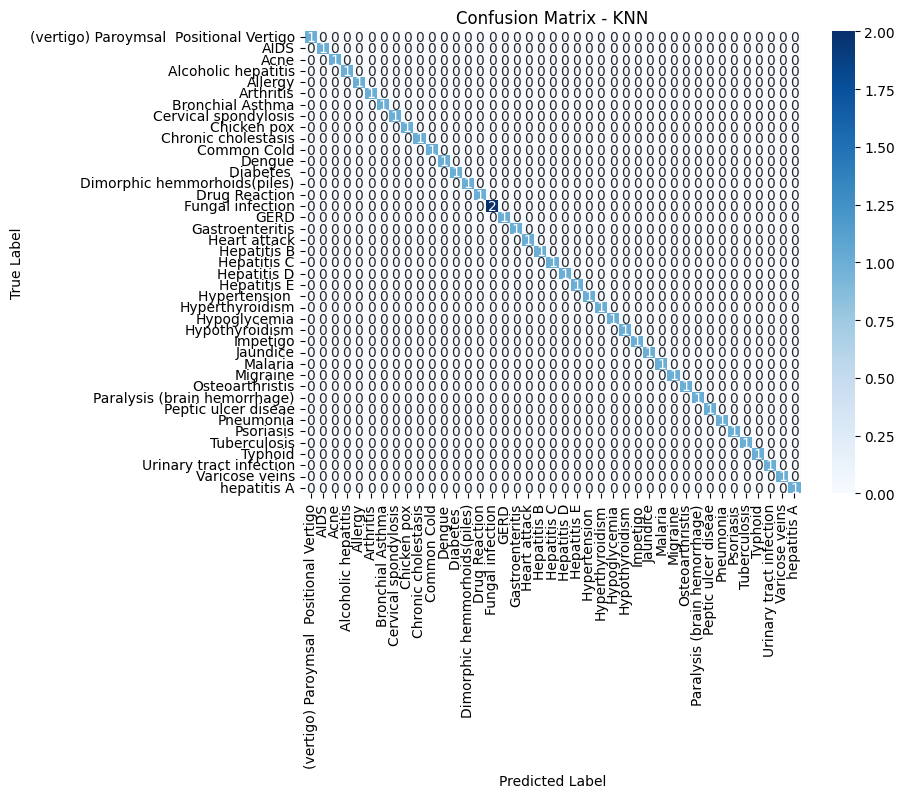

In [37]:
# Ensure P has 2D shape
P_2d = P.reshape(P.shape[0], -1)

P_df = pd.DataFrame(P_2d, columns=train_data.drop(columns=["prognosis"]).columns)
y_pred_knn = knn.predict(P_df)

# Decode predictions to original string labels
y_pred_knn_labels = le.inverse_transform(y_pred_knn)

# True labels
y_true = test_data["prognosis"]

# Metrics
accuracy = accuracy_score(y_true, y_pred_knn_labels)
precision = precision_score(y_true, y_pred_knn_labels, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_knn_labels, average='weighted', zero_division=1)

print(f"KNN Accuracy:  {accuracy:.2f}")
print(f"KNN Precision: {precision:.2f}")
print(f"KNN Recall:    {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_knn_labels, "KNN")


Decision_tree Accuracy:  0.98
Decision_tree Precision: 0.99
Decision_tree Recall:    0.98


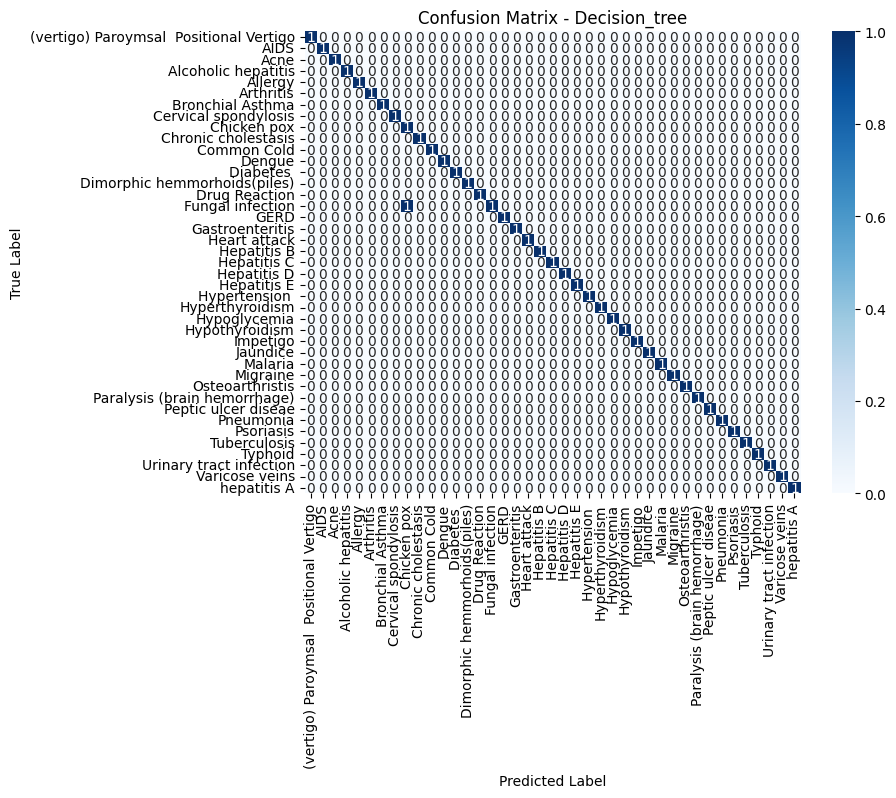

In [38]:
# Ensure P has 2D shape
P_2d = P.reshape(P.shape[0], -1)

P_df = pd.DataFrame(P_2d, columns=train_data.drop(columns=["prognosis"]).columns)
y_pred_decision_tree = decision_tree.predict(P_df)

# Decode predictions to original string labels
y_pred_decision_tree_labels = le.inverse_transform(y_pred_decision_tree)

# True labels
y_true = test_data["prognosis"]

# Metrics
accuracy = accuracy_score(y_true, y_pred_decision_tree_labels)
precision = precision_score(y_true, y_pred_decision_tree_labels, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_decision_tree_labels, average='weighted', zero_division=1)

print(f"Decision_tree Accuracy:  {accuracy:.2f}")
print(f"Decision_tree Precision: {precision:.2f}")
print(f"Decision_tree Recall:    {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_decision_tree_labels, "Decision_tree")


Random forest Accuracy:  0.98
Random forest Precision: 0.99
Random forest Recall:    0.98


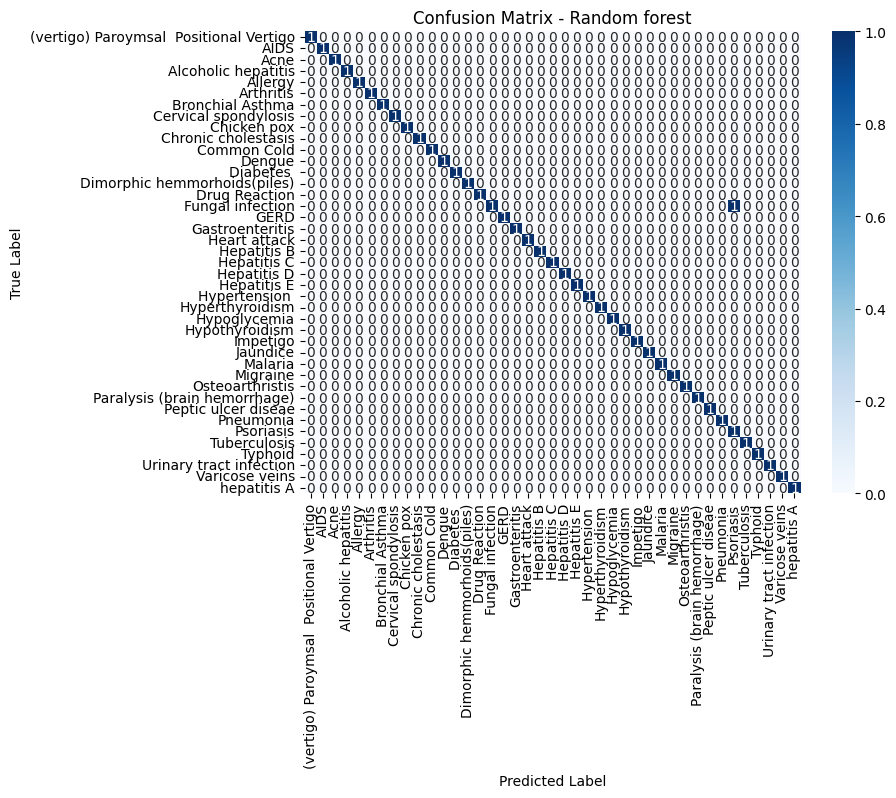

In [40]:
# Ensure P has 2D shape
P_2d = P.reshape(P.shape[0], -1)

P_df = pd.DataFrame(P_2d, columns=train_data.drop(columns=["prognosis"]).columns)
y_pred_random_forest = random_forest.predict(P_df)

# Decode predictions to original string labels
y_pred_random_forest_labels = le.inverse_transform(y_pred_random_forest)

# True labels
y_true = test_data["prognosis"]

# Metrics
accuracy = accuracy_score(y_true, y_pred_random_forest_labels)
precision = precision_score(y_true, y_pred_random_forest_labels, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_random_forest_labels, average='weighted', zero_division=1)

print(f"Random forest Accuracy:  {accuracy:.2f}")
print(f"Random forest Precision: {precision:.2f}")
print(f"Random forest Recall:    {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_random_forest_labels, "Random forest")


Svm Accuracy:  1.00
Svm Precision: 1.00
Svm Recall:    1.00


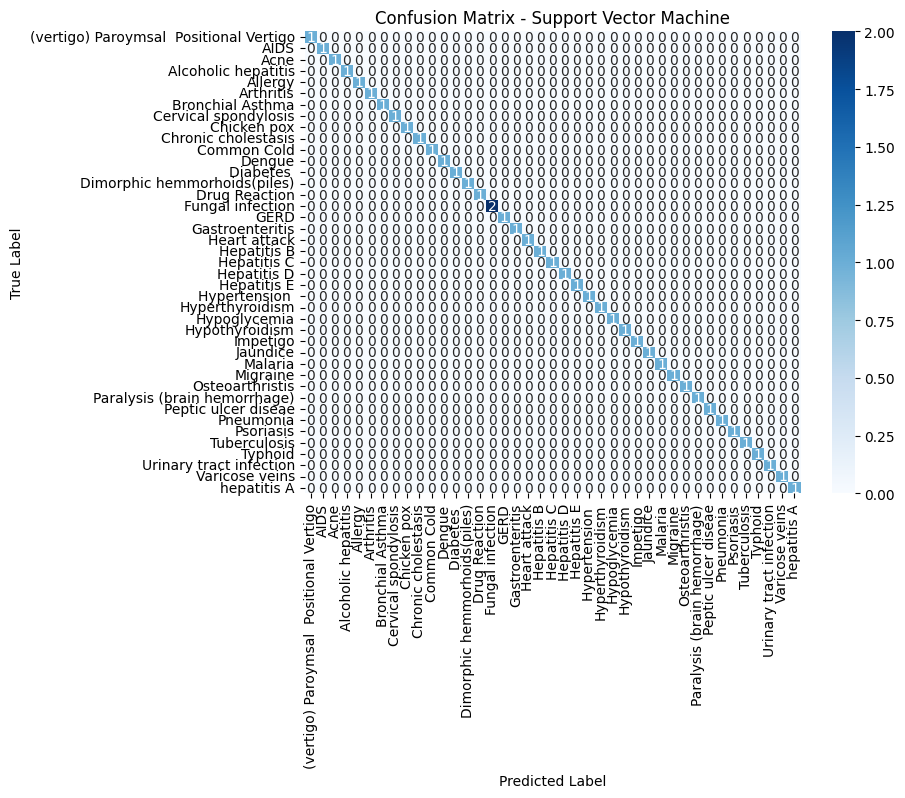

In [41]:
# Ensure P has 2D shape
P_2d = P.reshape(P.shape[0], -1)

P_df = pd.DataFrame(P_2d, columns=train_data.drop(columns=["prognosis"]).columns)
y_pred_svm = svm.predict(P_df)

# Decode predictions to original string labels
y_pred_svm_labels = le.inverse_transform(y_pred_svm)

# True labels
y_true = test_data["prognosis"]

# Metrics
accuracy = accuracy_score(y_true, y_pred_svm_labels)
precision = precision_score(y_true, y_pred_svm_labels, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_svm_labels, average='weighted', zero_division=1)

print(f"Svm Accuracy:  {accuracy:.2f}")
print(f"Svm Precision: {precision:.2f}")
print(f"Svm Recall:    {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_svm_labels, "Support Vector Machine")

MLP Accuracy:  0.98
MLP Precision: 0.99
MLP Recall:    0.98


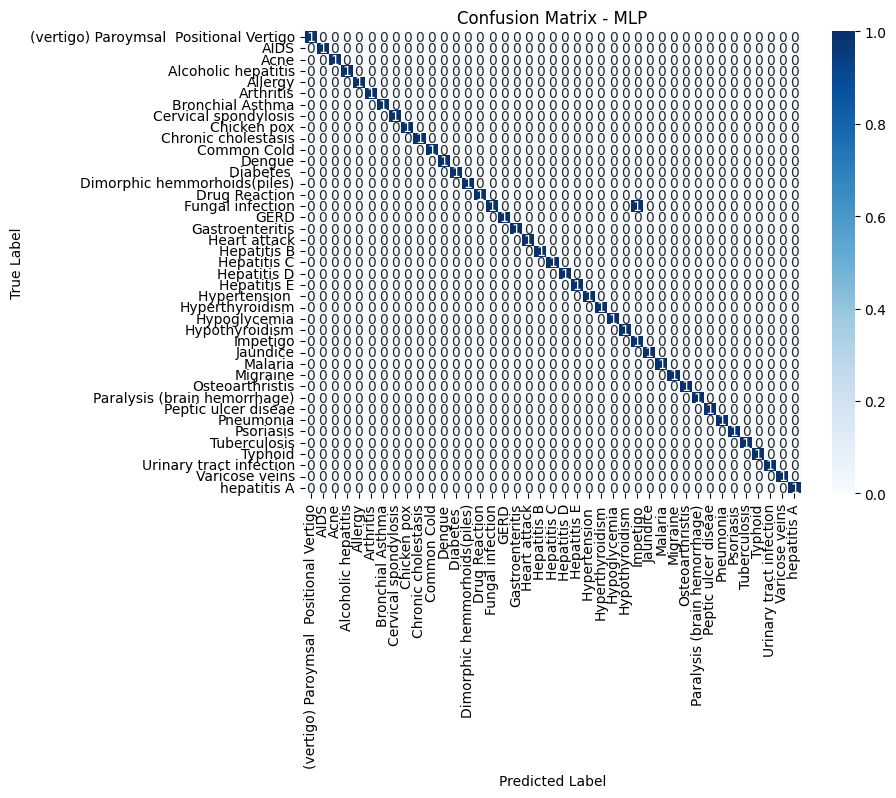

In [42]:
# Ensure P has 2D shape
P_2d = P.reshape(P.shape[0], -1)

P_df = pd.DataFrame(P_2d, columns=train_data.drop(columns=["prognosis"]).columns)
y_pred_mlp = mlp.predict(P_df)

# Decode predictions to original string labels
y_pred_mlp_labels = le.inverse_transform(y_pred_mlp)

# True labels
y_true = test_data["prognosis"]

# Metrics
accuracy = accuracy_score(y_true, y_pred_mlp_labels)
precision = precision_score(y_true, y_pred_mlp_labels, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_mlp_labels, average='weighted', zero_division=1)

print(f"MLP Accuracy:  {accuracy:.2f}")
print(f"MLP Precision: {precision:.2f}")
print(f"MLP Recall:    {recall:.2f}")

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_mlp_labels, "MLP")

In [52]:
def evaluate_on_test_set(model, X_test, y_test, model_name="Model", label_encoder=None):
    # Predict probabilities
    y_pred_proba = model.predict(X_test)

    # Convert to class indices
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Metrics
    print(f'CNN Accuracy:  {accuracy_score(y_true, y_pred):.2f}')
    print(f'CNN Precision: {precision_score(y_true, y_pred, average="weighted", zero_division=1):.2f}')
    print(f'CNN Recall:    {recall_score(y_true, y_pred, average="weighted", zero_division=1):.2f}')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Labels
    if label_encoder:
        class_names = label_encoder.inverse_transform(np.unique(y_true))
    else:
        class_names = np.unique(y_true)

    # Plot matching your original style
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN Accuracy:  1.00
CNN Precision: 1.00
CNN Recall:    1.00


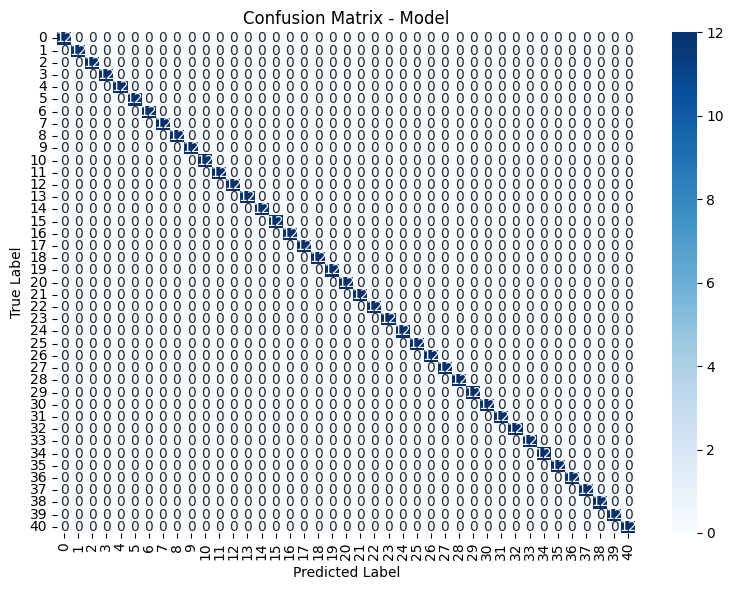

In [53]:
evaluate_on_test_set(cnn, X_test, y_test)

# Save Pre-trained model

In [54]:
import joblib

# store the pre-trained KNN  model
joblib.dump(knn, 'knn.joblib')
print("Το μοντέλο αποθηκεύτηκε επιτυχώς")

# loan of stored model
knn_loaded = joblib.load('knn.joblib')
print("Το μοντέλο φορτώθηκε επιτυχώς")

Το μοντέλο αποθηκεύτηκε επιτυχώς
Το μοντέλο φορτώθηκε επιτυχώς


## Find Symptoms

In [1]:
import pandas as pd

train_data = pd.read_csv("Training.csv")

def get_symptoms_for_disease(disease, dataset):
    # Find the row corresponding to the disease
    row = dataset[dataset["prognosis"] == disease]

    if row.empty:
        return f"Disease '{disease}' not found in dataset."

    # Get symptoms where the value is 1
    symptoms = row.drop(columns=["prognosis"]).iloc[0]  # Drop prognosis column
    symptom_list = symptoms[symptoms == 1].index.tolist()  # Get column names where value is 1
    
    return symptom_list if symptom_list else f"No symptoms found for '{disease}'."

# Example usage
disease_name = "Diabetes "  
symptoms = get_symptoms_for_disease(disease_name, train_data)

print(f"Symptoms for '{disease_name}': {symptoms}")


Symptoms for 'Diabetes ': ['fatigue', 'weight_loss', 'restlessness', 'lethargy', 'irregular_sugar_level', 'blurred_and_distorted_vision', 'obesity', 'excessive_hunger', 'increased_appetite', 'polyuria']


In [55]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the datasets
train_data = pd.read_csv("Training.csv")

# Extract features (symptoms) and labels (prognosis)
X = train_data.drop(columns=["prognosis"])
y = train_data["prognosis"]

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Function to process input symptoms and make predictions
def predict_disease(symptoms_list):
    # Convert symptoms to a one-hot encoded input
    input_vector = np.zeros(len(X.columns))  # Create a zero vector
    
    for symptom in symptoms_list:
        if symptom in X.columns:
            input_vector[X.columns.get_loc(symptom)] = 1  # Mark symptoms as 1
        else:
            print(f"Warning: '{symptom}' is not found in dataset features.")

    input_vector = input_vector.reshape(1, -1)  # Reshape for model input

    # KNN Prediction
    knn_prediction = knn.predict(input_vector)[0]

    return {"KNN Prediction": knn_prediction}

# Example usage
user_symptoms = ['acidity', 'indigestion', 'headache', 'blurred_and_distorted_vision', 'excessive_hunger', 'stiff_neck', 'depression', 'irritability', 'visual_disturbances']  

# Call the prediction function
predictions = predict_disease(user_symptoms)

for model, disease in predictions.items():
    print(f"{model}: {disease}")


KNN Prediction: Migraine


C:\Users\evage\anaconda3\envs\clean_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
